In [13]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [7]:
# 1. Charger CIFAR-10 
(x_train, _), (x_test, _) = cifar10.load_data()  
x_train = x_train.reshape(50000, 32*32*3) / 255.0  
x_test = x_test.reshape(10000, 32*32*3) / 255.0   

In [8]:
input_layer = Input(shape=(32*32*3,)) # Entrée
# Encoding
encoded1 = Dense(1024, activation='relu')(input_layer) 
encoded2 = Dense(512, activation='relu')(encoded1) 
bottleneck = Dense(64, activation='relu')(encoded2) 
# Decoding
decoded1 = Dense(512, activation='relu')(bottleneck) 
decoded2 = Dense(1024, activation='relu')(decoded1) 

output_layer = Dense(32*32*3, activation='sigmoid')(decoded2) 

In [9]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')


In [10]:
hist = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - loss: 0.0506 - val_loss: 0.0302
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - loss: 0.0282 - val_loss: 0.0244
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - loss: 0.0241 - val_loss: 0.0242
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - loss: 0.0232 - val_loss: 0.0222
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 47s 237ms/step - loss: 0.0220 - val_loss: 0.0214
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - loss: 0.0214 - val_loss: 0.0216
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - loss: 0.0213 - val_loss: 0.0212
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - loss: 0.0211 - val_loss: 0.0210
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - loss: 0.0208 - val_loss: 0.0205
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 119ms/step - loss: 0.0202 - val_loss: 0.0204
Epoch 12/20
196/196

In [24]:
# Sélectionner une image de test
test_img = x_test[10].reshape(1, 3072)  
reconstructed_img = autoencoder.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


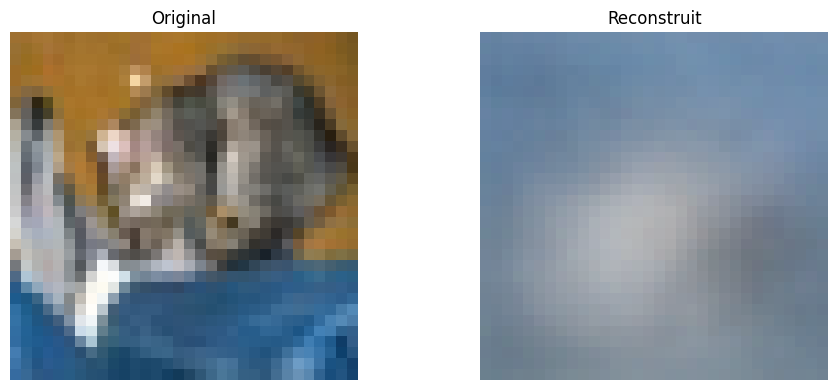

In [25]:
# Afficher l'original vs reconstruit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(32, 32, 3))  # Utiliser x_test[0] original pour l'affichage
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img.reshape(32, 32, 3))
plt.title("Reconstruit")
plt.axis('off')

plt.tight_layout()
plt.show()

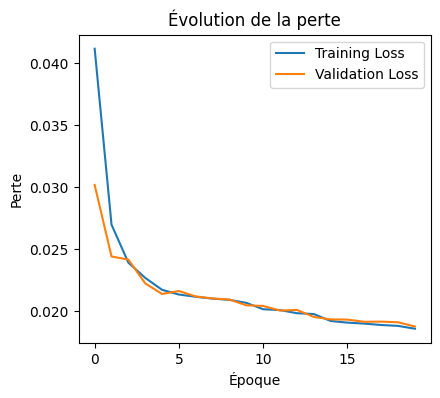

In [20]:
# Afficher la courbe de perte
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


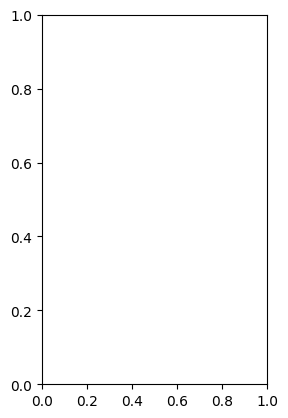

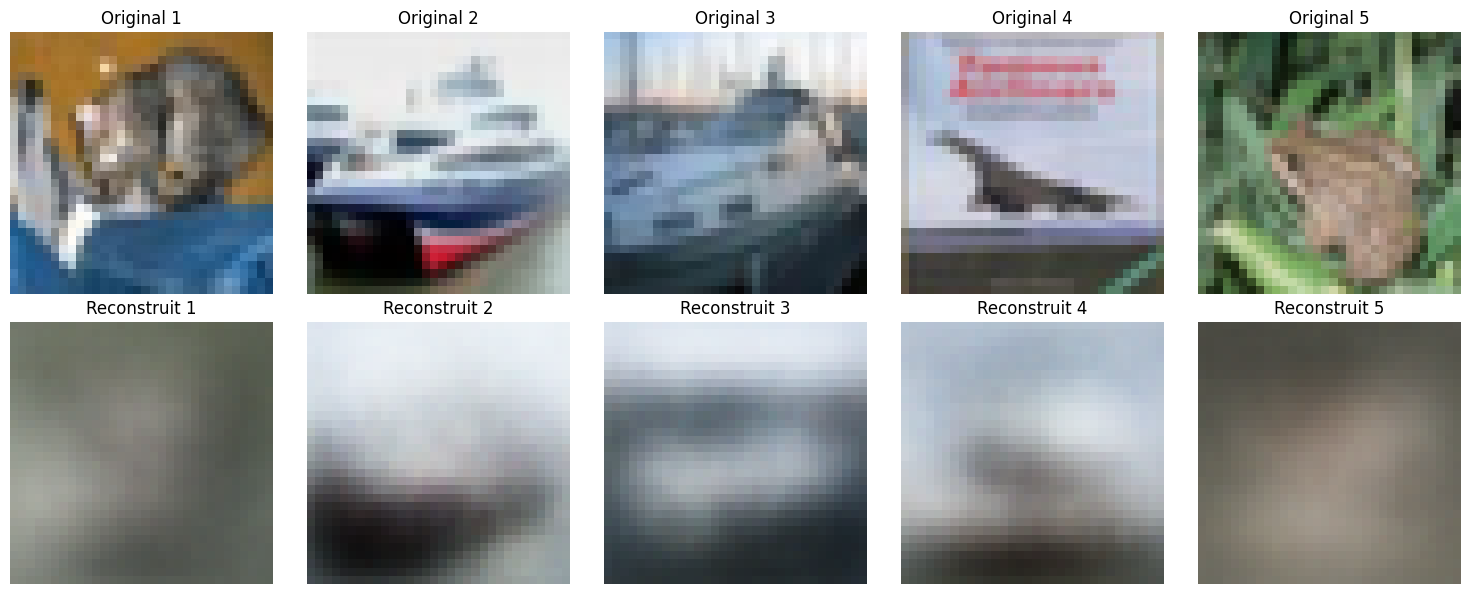

In [21]:
# Afficher plusieurs reconstructions
plt.subplot(1, 2, 2)
n_images = 5
plt.figure(figsize=(15, 6))
for i in range(n_images):
    # Original
    plt.subplot(2, n_images, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.title(f"Original {i+1}")
    plt.axis('off')
    
    # Reconstruit
    test_sample = x_test[i].reshape(1, 3072)
    reconstructed = autoencoder.predict(test_sample)
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(reconstructed.reshape(32, 32, 3))
    plt.title(f"Reconstruit {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()